In [16]:
#### CODE TO GENERATE BARPLOTS WITH PERCENTAGES OF DRIVER MUTATIONS ##############

# Import necessary libraries
import numpy as np  # Library for numerical computations and arrays
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for creating visualizations and plots
import os  # Library for interacting with the operating system (files, directories)
import seaborn as sns  # Library for statistical data visualization

# Load mutation data obtained with the specific filter applied after variant calling to obtain driver mutations
df_mutations = pd.read_excel('/home/vant/TFM/High_Filter_Davidaltreads40VAF0.1.xlsx')

# Remove specific samples with artefacts and mixed case (RVB3)
df_mutations = df_mutations[~df_mutations['Sample'].isin(['OVE44', 'OVE16','RVB3'])]

# Rename specific samples in df_mutations
df_mutations['Sample'] = df_mutations['Sample'].replace({
    'LP16_old': 'LP16', 
    'LP17_old': 'LP17', 
    'MDA51T1': 'MDA51_T1_CCC', 
    'MDA51T2': 'MDA51_T2_EC'
})

# Load file containing other variables
df_variables = pd.read_excel('Samples_alltypedata_annotated.xlsx')

# Remove the first two rows from df_variables (contain description and coding information)
df_variables = df_variables.iloc[2:].reset_index(drop=True)

########Firstly we change misclassified samples to redo the analysis  #######################
# Change the values to 'MMRp' for samples 'LP20', 'LP26', and 'MDA15'
# We use .loc[] to access specific rows where 'ID_CNIO' matches one of the specified samples
df_variables.loc[df_variables['ID_CNIO'].isin(['LP20', 'LP26', 'MDA15']), 'MMR_final_status'] = 'MMRp'

# Change the value to 'MMRd' for sample 'MDA26' 
df_variables.loc[df_variables['ID_CNIO'].isin(['MDA26']), 'MMR_final_status'] = 'MMRd'

# Remove samples with artefacts in variant calling and mixed case (RVB3)
df_variables = df_variables[~df_variables['ID_CNIO'].isin(['OVE44', 'OVE16','RVB3'])]

# Select necessary columns and make an independent copy
columns_of_interest = ['ID_CNIO','HISTOLOGY','MMR_final_status','FIGOa','GRADE']
df_variables_filtered = df_variables[columns_of_interest].copy()

# Clean values for merging in the independent copy
df_variables_filtered['ID_CNIO'] = df_variables_filtered['ID_CNIO'].str.strip().str.upper()

# Clean values in df_mutations
df_mutations['Sample'] = df_mutations['Sample'].str.strip().str.upper()

# Merge DataFrames based on common columns. I keep only samples in both dataframes
df_combined = pd.merge(df_mutations, df_variables_filtered, left_on='Sample', right_on='ID_CNIO', how='inner')

# Print the length of the combined DataFrame
print("Length of df_combined is:", len(df_combined))

# Save a subset of the combined data to an Excel file
mutations_subset = df_combined[['Sample', 'Gene','Function', 'Abbreviation', 'Ref', 'Alt', 'HISTOLOGY','MMR_final_status','FIGOa','GRADE']]
mutations_subset.to_excel("EntireCohortMutationsDrivers.xlsx", index=False)

Length of df_combined is: 583


In [17]:
# Calculate the total number of samples in the entire cohort (including those without mutations)
total_samples = len(df_variables_filtered['ID_CNIO'].unique()) 
print("Total number of samples (including those without mutations):", total_samples)

# Calculate the total number of samples in the entire cohort with mutations in the mutations file
total_samples_onlymut = len(df_mutations['Sample'].unique())
print("Total number of samples with mutations:", total_samples_onlymut)

# Calculate the total number of samples in the entire cohort with mutations and variables data
total_samples_mut = len(mutations_subset['Sample'].unique())
print("Total number of samples with mutations and variable data:", total_samples_mut)

# Keep unique combinations Sample-Gene
unique_mutations_per_sample = mutations_subset.drop_duplicates(subset=['Sample', 'Gene'])
print(unique_mutations_per_sample.head())
unique_mutations_per_sample.to_excel("Unique combinations sample-gene.xlsx",index=False)

# Calculate the number of samples mutated per gene
mut_samples_per_gene = unique_mutations_per_sample['Gene'].value_counts()
print("Number of samples mutated per gene:\n", mut_samples_per_gene)

# Calculate the percentage of samples in which each gene is mutated 
mutation_percentage = (mut_samples_per_gene / total_samples) * 100
print("Percentage of mutated samples per gene:\n",mutation_percentage)

# Get the dataframe with the top 20 genes most mutated genes and their percentages
top_20_genes = mutation_percentage.head(20)
print("Top 20 genes:\n", top_20_genes)
# Create a DataFrame with the percentage results for the top 20 genes
top_20_results_df = pd.DataFrame({
    'Gene': top_20_genes.index,
    'Mutation Percentage': top_20_genes.values
})

# Save the results to an Excel file
top_20_results_df.to_excel("Top_20_Mutation_Percentage_entirecohort.xlsx", index=False)

Total number of samples (including those without mutations): 166
Total number of samples with mutations: 160
Total number of samples with mutations and variable data: 153
  Sample    Gene             Function Abbreviation Ref Alt HISTOLOGY  \
0    LP1  ARID1A             stopgain       Q1346X   C   T         0   
1    LP1  CTNNB1             missense         S33C   C   G         0   
2    LP1    PTEN             stopgain         Q17X   C   T         0   
3   LP13  ARID1A             stopgain       L2147X   T   A         0   
4   LP13  PIK3R1  frameshift_deletion   K513Nfs*19  TA   T         0   

  MMR_final_status FIGOa GRADE  
0             MMRp     1     2  
1             MMRp     1     2  
2             MMRp     1     2  
3             MMRp     4     2  
4             MMRp     4     2  
Number of samples mutated per gene:
 Gene
ARID1A    79
PIK3CA    70
CTNNB1    38
KRAS      35
PTEN      34
          ..
BMPR2      1
STK11      1
HRAS       1
FGFR1      1
ARID2      1
Name: count, 

In [18]:
# Obtain the most frequently mutated genes (Top 20 genes)
top_genes = mutation_percentage.head(20).index
print("Top genes:\n",top_genes)
# Extract mutations dataframe for top 20 genes
top_mutations = mutations_subset[mutations_subset['Gene'].isin(top_genes)]
print("Top mutations:\n",top_mutations)
# Calculate the number of samples with mutations in the top 20 most frequently mutated genes
total_samples_top_mut = len(top_mutations['Sample'].unique())
print("Number of samples with mutations in top 20 most mutated genes:",total_samples_top_mut)
# Save the results
top_mutations.to_excel("Top_20_genes_mutated_allcohorts.xlsx",index=False)

Top genes:
 Index(['ARID1A', 'PIK3CA', 'CTNNB1', 'KRAS', 'PTEN', 'TP53', 'PPP2R1A',
       'FBXW7', 'PIK3R1', 'ATM', 'KMT2C', 'MSH6', 'ARID1B', 'ERBB2', 'NF1',
       'BRCA2', 'MLH1', 'CSMD3', 'MSH2', 'BRCA1'],
      dtype='object', name='Gene')
Top mutations:
     Sample    Gene             Function Abbreviation    Ref Alt HISTOLOGY  \
0      LP1  ARID1A             stopgain       Q1346X      C   T         0   
1      LP1  CTNNB1             missense         S33C      C   G         0   
2      LP1    PTEN             stopgain         Q17X      C   T         0   
3     LP13  ARID1A             stopgain       L2147X      T   A         0   
4     LP13  PIK3R1  frameshift_deletion   K513Nfs*19     TA   T         0   
..     ...     ...                  ...          ...    ...  ..       ...   
575   RVB5    PTEN  frameshift_deletion    K267Rfs*9     TA   T         1   
576   RVB5    PTEN             stopgain        T319*  GTACT   G         1   
578   RVB5   BRCA1  frameshift_deletion   K65

In [19]:
# Create a list of genes ordered by mutation percentage to use (Top 20 in the entire cohort)
genes_sorted_by_percentage = top_20_genes.index.tolist()

# Remove duplicate rows based on 'Sample', 'Gene', 'MMR_final_status', and 'HISTOLOGY' columns. 'MMR_final_status' and 'HISTOLOGY' values
# are always the same for the same sample. Here we add these columns because we need this information later.
mutations_subset_unique = mutations_subset[['Sample', 'Gene', 'MMR_final_status', 'HISTOLOGY']].drop_duplicates()

In [20]:
##### ANALYSE MUTATION PERCENTAGES IN TOP 20 GENES (IN THE ENTIRE COHORT: EOC+CC) #######################
### Calculate the total number of unique samples in every subgroup ##########
### EOC MMRp
eoc_mmrp = df_variables[
    (df_variables['MMR_final_status'] == 'MMRp') & (df_variables['HISTOLOGY'] == 0)
]
# Calculate the total number of samples 
total_eoc_mmrp = len(eoc_mmrp['ID_CNIO'].unique()) 
print("Total number of MMRp E samples (including those without mutations):", total_eoc_mmrp)
### EOC MMRd 
eoc_mmrd = df_variables[
    (df_variables['MMR_final_status'] == 'MMRd') & (df_variables['HISTOLOGY'] == 0)
]
# Calculate the total number of samples 
total_eoc_mmrd = len(eoc_mmrd['ID_CNIO'].unique()) 
print("Total number of MMRd E samples (including those without mutations):", total_eoc_mmrd)
## CC MMRp
cc_mmrp = df_variables[
    (df_variables['MMR_final_status'] == 'MMRp') & (df_variables['HISTOLOGY'] == 1)
]
# Calculate the total number of samples (including those without mutations)
total_cc_mmrp = len(cc_mmrp['ID_CNIO'].unique()) 
print("Total number of MMRp CC samples (including those without mutations):", total_cc_mmrp)
## CC MMRd
cc_mmrd = df_variables[
    (df_variables['MMR_final_status'] == 'MMRd') & (df_variables['HISTOLOGY'] == 1)
]
# Calculate the total number of samples in the entire cohort (including those without mutations)
total_cc_mmrd = len(cc_mmrd['ID_CNIO'].unique()) 
print("Total number of MMRd CC samples (including those without mutations):", total_cc_mmrd)

### Preparate mutations data for every subgroup
eoc_mmrp_mut= mutations_subset_unique[(mutations_subset_unique['HISTOLOGY']==0) & (mutations_subset_unique['MMR_final_status']=='MMRp')]
eoc_mmrd_mut=mutations_subset_unique[(mutations_subset_unique['HISTOLOGY']==0) & (mutations_subset_unique['MMR_final_status']=='MMRd')]
cc_mmrp_mut= mutations_subset_unique[(mutations_subset_unique['HISTOLOGY']==1) & (mutations_subset_unique['MMR_final_status']=='MMRp')]
cc_mmrd_mut= mutations_subset_unique[(mutations_subset_unique['HISTOLOGY']==1) & (mutations_subset_unique['MMR_final_status']=='MMRd')]

Total number of MMRp E samples (including those without mutations): 77
Total number of MMRd E samples (including those without mutations): 12
Total number of MMRp CC samples (including those without mutations): 72
Total number of MMRd CC samples (including those without mutations): 5


In [21]:
# Function to calculate the percentage per gene
print(eoc_mmrd_mut)
def calculate_gene_percentage(data, total_samples):
    gene_counts = data['Gene'].value_counts()
    return (gene_counts / total_samples) * 100

# Calculate the mutation percentage in every subgroup
eoc_mmrd_percentages = calculate_gene_percentage(eoc_mmrd_mut, total_eoc_mmrd)
print("EOC MMRd gene percentage:",eoc_mmrd_percentages.head(50))
eoc_mmrp_percentages = calculate_gene_percentage(eoc_mmrp_mut, total_eoc_mmrp)
print("EOC MMRp gene percentage:",eoc_mmrp_percentages.head(30))
cc_mmrd_percentages = calculate_gene_percentage(cc_mmrd_mut, total_cc_mmrd)
print("CC MMRd gene percentage:",cc_mmrd_percentages.head(50))
cc_mmrp_percentages = calculate_gene_percentage(cc_mmrp_mut, total_cc_mmrp)
print("CC MMRp gene percentage:",cc_mmrp_percentages.head(40))

    Sample    Gene MMR_final_status HISTOLOGY
7     LP16  ARID1A             MMRd         0
8     LP16    TP53             MMRd         0
10    LP16   XYLT2             MMRd         0
11    LP16   LMAN1             MMRd         0
12    LP16   TEAD2             MMRd         0
..     ...     ...              ...       ...
566   RVB2   BRIP1             MMRd         0
567   RVB2   POLD1             MMRd         0
580   RVB6  ARID1A             MMRd         0
581   RVB6   ARID2             MMRd         0
582   RVB6   ERBB2             MMRd         0

[118 rows x 4 columns]
EOC MMRd gene percentage: Gene
ARID1A     83.333333
PTEN       83.333333
KRAS       41.666667
PIK3CA     33.333333
DOCK3      33.333333
WDTC1      25.000000
ERBB2      25.000000
MLH1       25.000000
MSH3       25.000000
MSH6       25.000000
TEAD2      25.000000
TP53       16.666667
ATM        16.666667
NRAS       16.666667
TSC1       16.666667
SLC3A2     16.666667
POLD1      16.666667
PMS2       16.666667
APC        16.6

In [22]:
# Create dataframes with genes and percentages
eoc_mmrd_df = pd.DataFrame({'Gene': eoc_mmrd_percentages.index, 'Percentage': eoc_mmrd_percentages.values})
eoc_mmrp_df = pd.DataFrame({'Gene': eoc_mmrp_percentages.index, 'Percentage': eoc_mmrp_percentages.values})
cc_mmrd_df = pd.DataFrame({'Gene': cc_mmrd_percentages.index, 'Percentage': cc_mmrd_percentages.values})
cc_mmrp_df = pd.DataFrame({'Gene': cc_mmrp_percentages.index, 'Percentage': cc_mmrp_percentages.values})

# Reorder the DataFrames according to the most mutated genes in the entire cohort
# 1. Set Gene as the index. 2.Use reindex(genes_sorted_by_percentage) to rearrange the rows in the specified order.
# 3.fillna(0) assigns a percentage of 0 to any gene that might be missing from the original DataFrame and 4.reset_index() turns Gene back 
# into a column after reordering.
eoc_mmrd_df = eoc_mmrd_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
eoc_mmrp_df = eoc_mmrp_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
cc_mmrd_df = cc_mmrd_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
cc_mmrp_df = cc_mmrp_df.set_index('Gene').reindex(genes_sorted_by_percentage).fillna(0).reset_index()
# Save dataframes (one sheet for every subgroup)
with pd.ExcelWriter('mutations_percentages.xlsx') as writer:
    eoc_mmrd_df.to_excel(writer, sheet_name='EOC MMRd', index=False)
    eoc_mmrp_df.to_excel(writer, sheet_name='EOC MMRp', index=False)
    cc_mmrd_df.to_excel(writer, sheet_name='CC MMRd', index=False)
    cc_mmrp_df.to_excel(writer, sheet_name='CC MMRp', index=False)

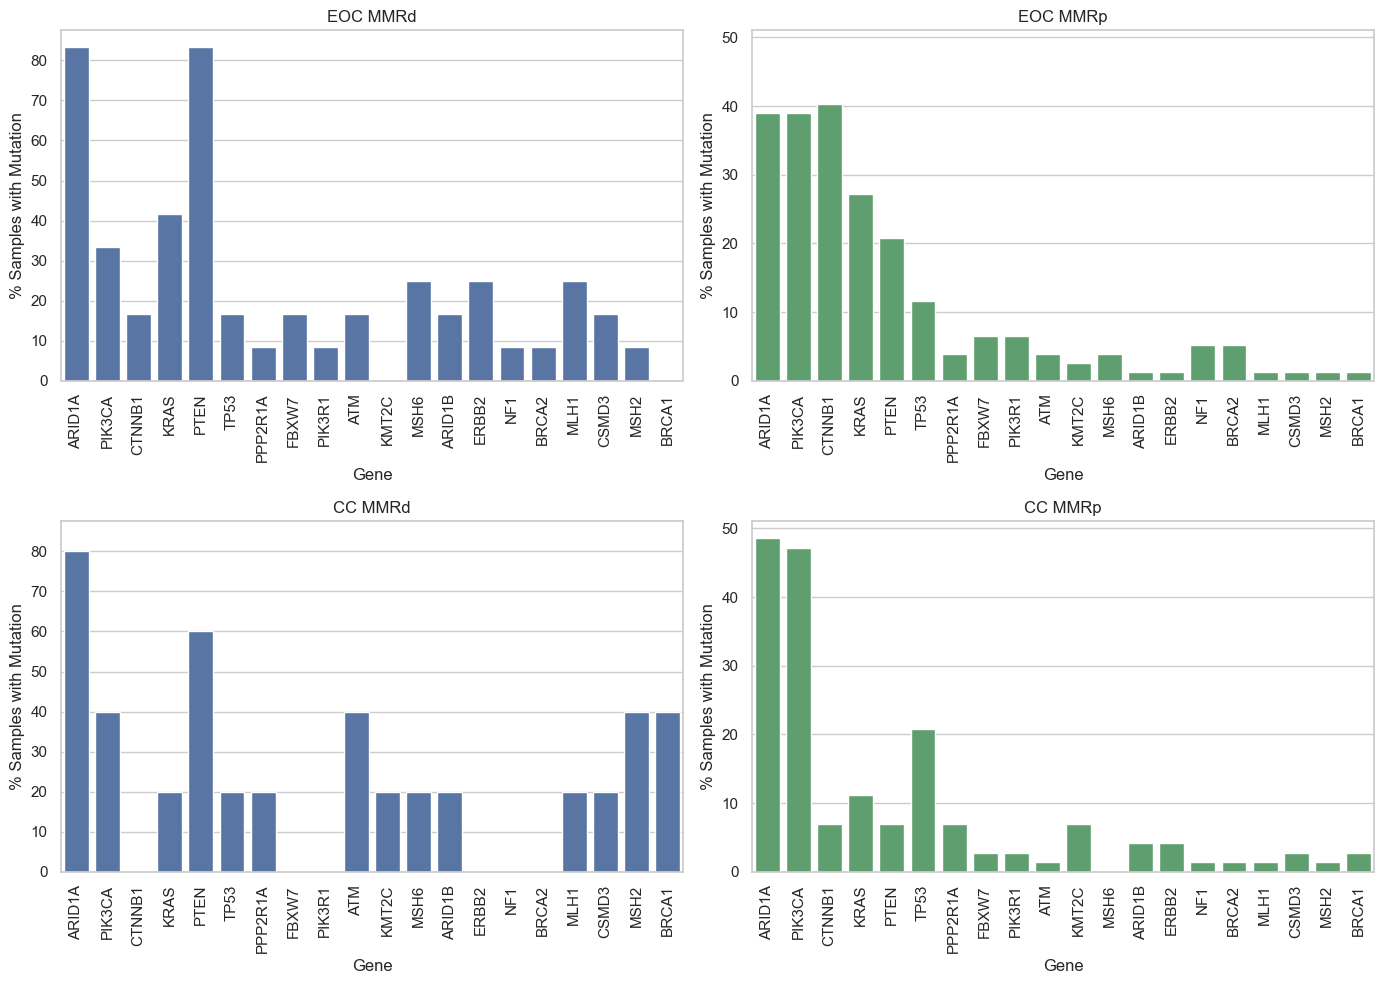

In [23]:
##### BARPLOTS FOR EVERY SUBGROUP ###################################

# Uncomment to import if not done previously
#import matplotlib.pyplot as plt
#import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Number of genes (for consistent tick positioning)
num_genes = len(genes_sorted_by_percentage)
x_ticks = range(num_genes)

# Plot the mutation percentage for EOC MMRd
sns.barplot(x='Gene', y='Percentage', data=eoc_mmrd_df, order=genes_sorted_by_percentage, ax=axes[0, 0], color='b')
axes[0, 0].set_title('EOC MMRd')
axes[0, 0].set_ylabel('% Samples with Mutation')
axes[0, 0].set_xticks(x_ticks)
axes[0, 0].set_xticklabels(genes_sorted_by_percentage, rotation=90, ha='center')  # Set gene names

# Plot the mutation percentage for EOC MMRp
sns.barplot(x='Gene', y='Percentage', data=eoc_mmrp_df, order=genes_sorted_by_percentage, ax=axes[0, 1], color='g')
axes[0, 1].set_title('EOC MMRp')
axes[0, 1].set_ylabel('% Samples with Mutation')
axes[0, 1].set_xticks(x_ticks)
axes[0, 1].set_xticklabels(genes_sorted_by_percentage, rotation=90, ha='center')  # Set gene names

# Plot the mutation percentage for CC MMRd
sns.barplot(x='Gene', y='Percentage', data=cc_mmrd_df, order=genes_sorted_by_percentage, ax=axes[1, 0], color='b')
axes[1, 0].set_title('CC MMRd')
axes[1, 0].set_ylabel('% Samples with Mutation')
axes[1, 0].set_xticks(x_ticks)
axes[1, 0].set_xticklabels(genes_sorted_by_percentage, rotation=90, ha='center')  # Set gene names

# Plot the mutation percentage for CC MMRp
sns.barplot(x='Gene', y='Percentage', data=cc_mmrp_df, order=genes_sorted_by_percentage, ax=axes[1, 1], color='g')
axes[1, 1].set_title('CC MMRp')
axes[1, 1].set_ylabel('% Samples with Mutation')
axes[1, 1].set_xticks(x_ticks)
axes[1, 1].set_xticklabels(genes_sorted_by_percentage, rotation=90, ha='center')  # Set gene names

# Set y-axis limits: same for MMRp and same for MMRd
mmrd_max = max(axes[0, 0].get_ylim()[1], axes[1, 0].get_ylim()[1])  # Maximum for MMRd subplots
mmrp_max = max(axes[0, 1].get_ylim()[1], axes[1, 1].get_ylim()[1])  # Maximum for MMRp subplots

# Apply the same y-axis limits for MMRd and MMRp groups
axes[0, 0].set_ylim(0, mmrd_max)
axes[1, 0].set_ylim(0, mmrd_max)
axes[0, 1].set_ylim(0, mmrp_max)
axes[1, 1].set_ylim(0, mmrp_max)

# Adjust the space between subplots
plt.tight_layout()

# Show the plots
plt.show()

Gene: ARID1A, Test: Fisher's Exact Test, p-value: 0.005088837939280402
Gene: PIK3CA, Test: Fisher's Exact Test, p-value: 0.5232539852604949
Gene: CTNNB1, Test: Fisher's Exact Test, p-value: 0.049278663187609456
Gene: KRAS, Test: Fisher's Exact Test, p-value: 0.32187213713779583
Gene: PTEN, Test: Fisher's Exact Test, p-value: 4.579290847182297e-05
Gene: TP53, Test: Fisher's Exact Test, p-value: 1.0
Gene: PPP2R1A, Test: Fisher's Exact Test, p-value: 1.0
Gene: FBXW7, Test: Fisher's Exact Test, p-value: 0.523995725895487
Gene: PIK3R1, Test: Fisher's Exact Test, p-value: 1.0
Gene: ATM, Test: Fisher's Exact Test, p-value: 0.4457484479604985
Gene: KMT2C, Test: Fisher's Exact Test, p-value: 1.0
Gene: MSH6, Test: Fisher's Exact Test, p-value: 0.030292662734250242
Gene: ARID1B, Test: Fisher's Exact Test, p-value: 0.25280898876404495
Gene: ERBB2, Test: Fisher's Exact Test, p-value: 0.007140733265455071
Gene: NF1, Test: Fisher's Exact Test, p-value: 1.0
Gene: BRCA2, Test: Fisher's Exact Test, p-va

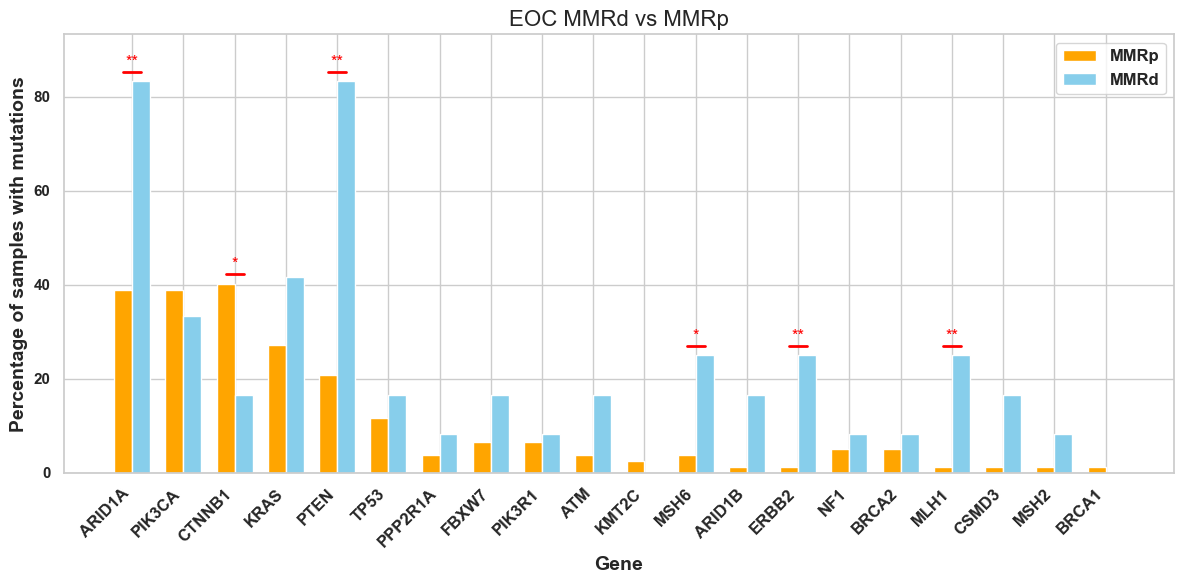

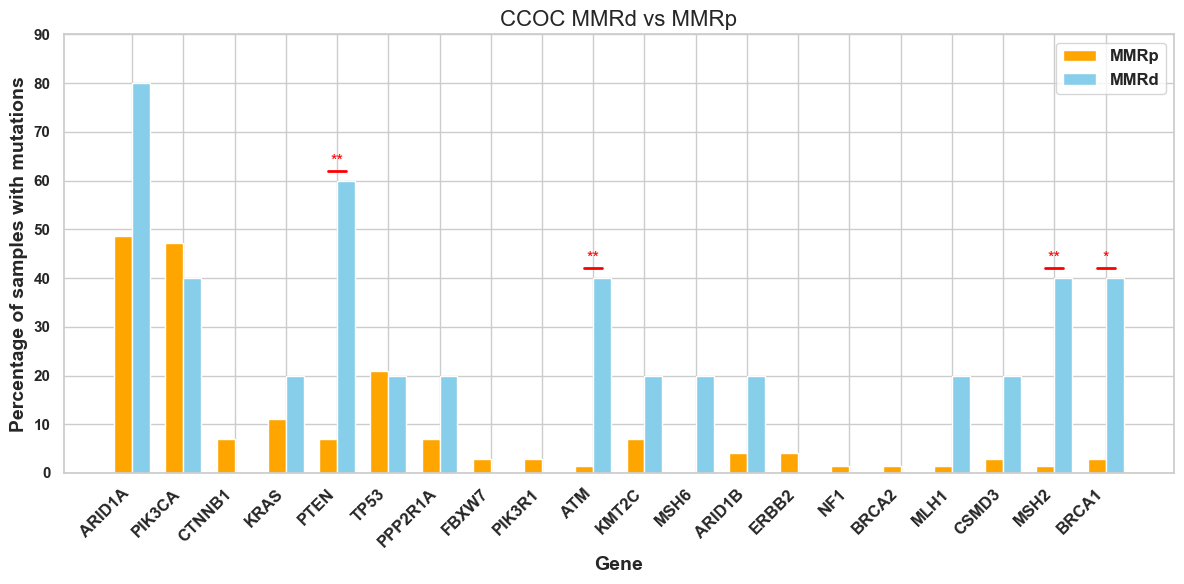

In [24]:
### BARPLOTS WITH SIGNIFICANTLY MUTATED GENES BETWEEN MMRp AND MMRd SAMPLES IN EACH HISTOLOGY ###########

# Import necessary libraries 
from scipy.stats import fisher_exact  # fisher_exact: it is used to analyze 2x2 contingency tables (small sizes)
from statsmodels.stats.proportion import proportions_ztest  # proportions_ztest: compare proportions in independent samples or for testing a specific proportion in a single sample.

# Uncomment to import if not done previously
#import matplotlib.pyplot as plt
#import seaborn as sns

# Function to compute statistical significance and generate significance labels
def compute_statistical_significance(df1, df2, n1, n2):
    significance_labels = []  # List to store significance labels (* or **)
    
    # Iterate over each gene in the dataframe
    for i, gene in enumerate(df1['Gene']):
        # Convert percentage to absolute count for both MMRd and MMRp
        count1 = int(df1.iloc[i]['Percentage'] * n1 / 100)
        count2 = int(df2.iloc[i]['Percentage'] * n2 / 100)

        # Check for valid values before proceeding
        if count1 < 0 or count2 < 0 or n1 - count1 < 0 or n2 - count2 < 0:
            significance_labels.append('')  # Skip this gene if values are invalid
            continue

        try:
            # Use Fisher's Exact Test for extreme or equal values
            contingency_table = [[count1, n1 - count1], [count2, n2 - count2]]
            _, p_value = fisher_exact(contingency_table)
            test_type = "Fisher's Exact Test"
        except ValueError:
            # Use Z-test only if the sample size is large enough
            if n1 > 30 and n2 > 30:
                try:
                    _, p_value = proportions_ztest([count1] * n1, [count2] * n2, value=0)
                    test_type = "Z-test"
                except Exception:
                    p_value = 1.0  # If both tests fail, p-value is not significant
                    test_type = "No test performed"
            else:
                p_value = 1.0  # If sample size is too small for Z-test, set p-value to non-significant
                test_type = "No test performed"
        
        # Print the test type and p-value for each gene
        print(f"Gene: {gene}, Test: {test_type}, p-value: {p_value}")

        # Add significance labels based on p-values
        if p_value < 0.01:
            significance_labels.append('**')
        elif p_value < 0.05:
            significance_labels.append('*')
        else:
            significance_labels.append('')
    
    # Return the list of significance labels for plotting
    return significance_labels

# Function to plot barplots with significance labels and horizontal lines for each gene
def plot_barplot_with_significance(df1, df2, title, significance_labels, filename):
    x = np.arange(len(df1['Gene']))  # X-axis positions for each gene
    width = 0.35  # Bar width

    fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure with specified size

    # Plot bars: MMRp (orange) first, then MMRd (skyblue)
    bar2 = ax.bar(x - width/2, df2['Percentage'], width, label='MMRp', color='orange')
    bar1 = ax.bar(x + width/2, df1['Percentage'], width, label='MMRd', color='skyblue')

    # Add horizontal lines and asterisks only if there's significance
    for i, label in enumerate(significance_labels):
        if label:  # Only add line and asterisks if there's a significance label
            # Calculate Y position for the line: just above the highest bar
            y_pos = max(df1.iloc[i]['Percentage'], df2.iloc[i]['Percentage']) + 2

            # Draw a horizontal line for the gene
            ax.plot([x[i] - width/2, x[i] + width/2], [y_pos, y_pos], color='red', lw=2)

            # Add asterisks above the line
            ax.text(x[i], y_pos + 0.5, label, ha='center', va='bottom', fontsize=12, color='red')

    # Customize the plot
    ax.set_xlabel('Gene', fontsize=14, fontweight='bold')  # Bold X-axis label
    ax.set_ylabel('Percentage of samples with mutations', fontsize=14, fontweight='bold')  # Bold Y-axis label
    ax.set_title(title, fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(df1['Gene'], rotation=45, ha='right', fontsize=12, fontweight='bold')  # Bold gene names on X-axis

    # Set legend with bold text for both the label and the title
    legend = ax.legend(fontsize=12, title_fontsize='13', loc='upper right')
    for label in legend.get_texts():
        label.set_fontweight('bold')

    # Set Y-axis numbers to bold
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    # Adjust the upper limit of the Y-axis to make space for the labels
    max_y = max(max(df1['Percentage']), max(df2['Percentage'])) + 5
    ax.set_ylim(0, max_y + 5)

    # Save the plot as a PNG file with dpi=300
    plt.tight_layout()
    plt.savefig(filename, dpi=300)  # Save as PNG with high dpi

    # Show the plot on screen
    plt.show()

    # Close the plot to avoid memory issues when saving multiple plots
    plt.close()

# Total sample sizes for each subgroup
#total_eoc_mmrd = 12  # Total samples for EOC MMRd
#total_eoc_mmrp = 77  # Total samples for EOC MMRp
#total_cc_mmrd = 5    # Total samples for CCOC MMRd
#total_cc_mmrp = 72   # Total samples for CCOC MMRp

# Compute significance labels for both datasets
eoc_significance = compute_statistical_significance(eoc_mmrd_df, eoc_mmrp_df, total_eoc_mmrd, total_eoc_mmrp)
cc_significance = compute_statistical_significance(cc_mmrd_df, cc_mmrp_df, total_cc_mmrd, total_cc_mmrp)

# Plot the barplot with significance for both datasets and save as PNG
plot_barplot_with_significance(eoc_mmrd_df, eoc_mmrp_df, 'EOC MMRd vs MMRp', eoc_significance, 'eoc_mmrp_mmrd_comparison.png')
plot_barplot_with_significance(cc_mmrd_df, cc_mmrp_df, 'CCOC MMRd vs MMRp', cc_significance, 'cc_mmrp_mmrd_comparison.png')

Gene: ARID1A, Test: Fisher's Exact Test, p-value: 0.3252219494501293
Gene: PIK3CA, Test: Fisher's Exact Test, p-value: 0.3252219494501293
Gene: CTNNB1, Test: Fisher's Exact Test, p-value: 2.0440314768416573e-06
Gene: KRAS, Test: Fisher's Exact Test, p-value: 0.013850587420937704
Gene: PTEN, Test: Fisher's Exact Test, p-value: 0.018413101430894262
Gene: TP53, Test: Fisher's Exact Test, p-value: 0.11132143906637207
Gene: PPP2R1A, Test: Fisher's Exact Test, p-value: 0.4834877771190712
Gene: FBXW7, Test: Fisher's Exact Test, p-value: 0.6821400629816362
Gene: PIK3R1, Test: Fisher's Exact Test, p-value: 0.6821400629816362
Gene: ATM, Test: Fisher's Exact Test, p-value: 0.6207476865746611
Gene: KMT2C, Test: Fisher's Exact Test, p-value: 0.263631888563332
Gene: MSH6, Test: Fisher's Exact Test, p-value: 0.245782695447125
Gene: ARID1B, Test: Fisher's Exact Test, p-value: 0.6100645228162005
Gene: ERBB2, Test: Fisher's Exact Test, p-value: 0.6100645228162005
Gene: NF1, Test: Fisher's Exact Test, p-

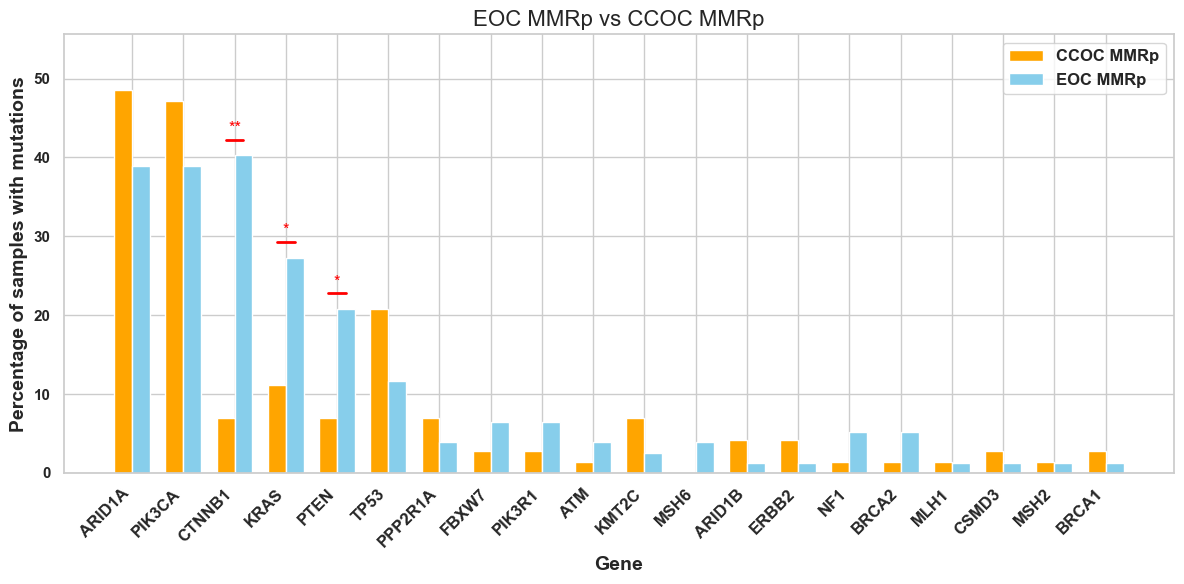

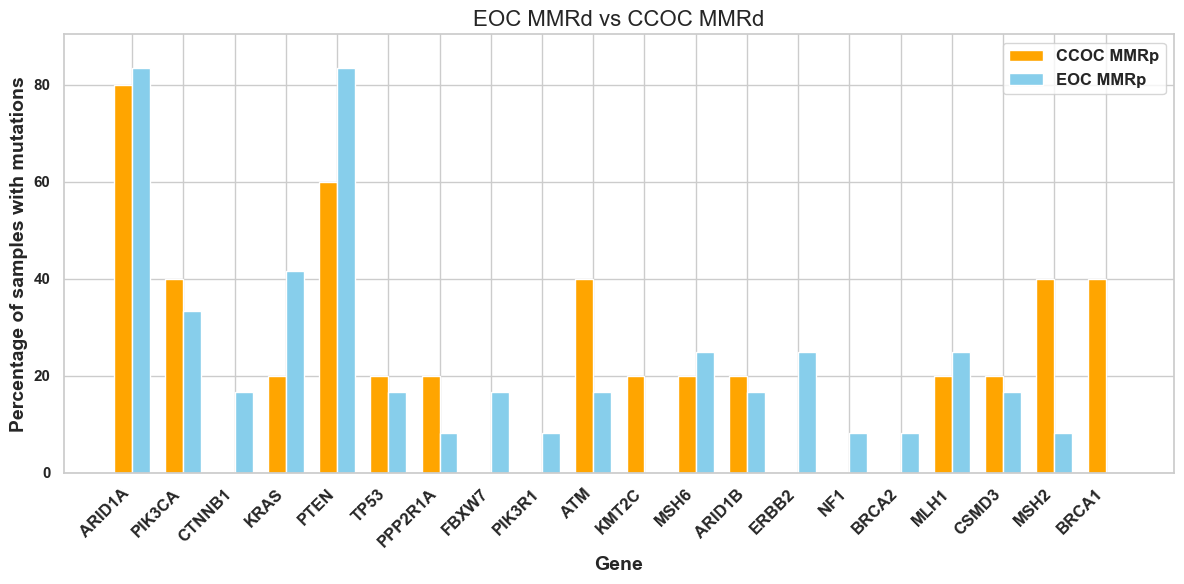

In [25]:
### BARPLOTS WITH SIGNIFICANTLY MUTATED GENES BETWEEN EOC AND CCOC HISTOTYPES IN EACH MMR STATUS GROUP ###########

# Uncomment to import if not done previously
# from scipy.stats import fisher_exact  # fisher_exact: it is used to analyze 2x2 contingency tables (small sizes)
# from statsmodels.stats.proportion import proportions_ztest  # proportions_ztest: compare proportions in independent samples or for testing a specific proportion in a single sample.
# import matplotlib.pyplot as plt
# import seaborn as sns

# Function to compute statistical significance and generate significance labels
def compute_statistical_significance(df1, df2, n1, n2):
    significance_labels = []  # List to store significance labels (* or **)
    
    # Iterate over each gene in the dataframe
    for i, gene in enumerate(df1['Gene']):
        # Convert percentage to absolute count for both MMRd and MMRp
        count1 = int(df1.iloc[i]['Percentage'] * n1 / 100)
        count2 = int(df2.iloc[i]['Percentage'] * n2 / 100)

        # Check for valid values before proceeding
        if count1 < 0 or count2 < 0 or n1 - count1 < 0 or n2 - count2 < 0:
            significance_labels.append('')  # Skip this gene if values are invalid
            continue

        try:
            # Use Fisher's Exact Test for extreme or equal values
            contingency_table = [[count1, n1 - count1], [count2, n2 - count2]]
            _, p_value = fisher_exact(contingency_table)
            test_type = "Fisher's Exact Test"
        except ValueError:
            # Use Z-test only if the sample size is large enough
            if n1 > 30 and n2 > 30:
                try:
                    _, p_value = proportions_ztest([count1] * n1, [count2] * n2, value=0)
                    test_type = "Z-test"
                except Exception:
                    p_value = 1.0  # If both tests fail, p-value is not significant
                    test_type = "No test performed"
            else:
                p_value = 1.0  # If sample size is too small for Z-test, set p-value to non-significant
                test_type = "No test performed"
        
        # Print the test type and p-value for each gene
        print(f"Gene: {gene}, Test: {test_type}, p-value: {p_value}")

        # Add significance labels based on p-values
        if p_value < 0.01:
            significance_labels.append('**')
        elif p_value < 0.05:
            significance_labels.append('*')
        else:
            significance_labels.append('')
    
    # Return the list of significance labels for plotting
    return significance_labels

# Function to plot barplots with significance labels and horizontal lines for each gene
def plot_barplot_with_significance(df1, df2, title, significance_labels, filename):
    x = np.arange(len(df1['Gene']))  # X-axis positions for each gene
    width = 0.35  # Bar width

    fig, ax = plt.subplots(figsize=(12, 6))  # Create a figure with specified size

    # Plot bars: MMRp (orange) first, then MMRd (skyblue)
    bar2 = ax.bar(x - width/2, df2['Percentage'], width, label='CCOC MMRp', color='orange')
    bar1 = ax.bar(x + width/2, df1['Percentage'], width, label='EOC MMRp', color='skyblue')

    # Add horizontal lines and asterisks only if there's significance
    for i, label in enumerate(significance_labels):
        if label:  # Only add line and asterisks if there's a significance label
            # Calculate Y position for the line: just above the highest bar
            y_pos = max(df1.iloc[i]['Percentage'], df2.iloc[i]['Percentage']) + 2

            # Draw a horizontal line for the gene
            ax.plot([x[i] - width/2, x[i] + width/2], [y_pos, y_pos], color='red', lw=2)

            # Add asterisks above the line
            ax.text(x[i], y_pos + 0.5, label, ha='center', va='bottom', fontsize=12, color='red')

    # Customize the plot
    ax.set_xlabel('Gene', fontsize=14, fontweight='bold')  # Bold X-axis label
    ax.set_ylabel('Percentage of samples with mutations', fontsize=14, fontweight='bold')  # Bold Y-axis label
    ax.set_title(title, fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(df1['Gene'], rotation=45, ha='right', fontsize=12, fontweight='bold')  # Bold gene names on X-axis

    # Set legend with bold text for both the label and the title
    legend = ax.legend(fontsize=12, title_fontsize='13', loc='upper right')
    for label in legend.get_texts():
        label.set_fontweight('bold')

    # Set Y-axis numbers to bold
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    # Adjust the upper limit of the Y-axis to make space for the labels
    max_y = max(max(df1['Percentage']), max(df2['Percentage'])) + 5
    ax.set_ylim(0, max_y + 2)

    # Save the plot as a PNG file with dpi=300
    plt.tight_layout()
    plt.savefig(filename, dpi=300)  # Save as PNG with high dpi

    # Show the plot on screen
    plt.show()

    # Close the plot to avoid memory issues when saving multiple plots
    plt.close()

# Total sample sizes for each subgroup
#total_eoc_mmrp = 77  # Total samples for EOC MMRp
#total_cc_mmrp = 72   # Total samples for CCOC MMRp
#total_eoc_mmrd = 12  # Total samples for EOC MMRd
#total_cc_mmrd = 5    # Total samples for CCOC MMRd

# Compute significance labels for both datasets
eoc_cc_mmrp_significance = compute_statistical_significance(eoc_mmrp_df, cc_mmrp_df, total_eoc_mmrp, total_cc_mmrp)
eoc_cc_mmrd_significance = compute_statistical_significance(eoc_mmrd_df, cc_mmrd_df, total_eoc_mmrd, total_cc_mmrd)

# Plot the barplot with significance for both datasets and save as PNG
plot_barplot_with_significance(eoc_mmrp_df, cc_mmrp_df, 'EOC MMRp vs CCOC MMRp', eoc_cc_mmrp_significance, 'eoc_cc_mmrp_comparison.png')
plot_barplot_with_significance(eoc_mmrd_df, cc_mmrd_df, 'EOC MMRd vs CCOC MMRd', eoc_cc_mmrd_significance, 'eoc_cc_mmrd_comparison.png')
